# Home Credit Scorecard Model

Name: Novi Handayani

LinkedIn: https://www.linkedin.com/in/novhdn/

GitHub: https://github.com/novihdn 

# Problem Understanding

**Home Credit Indonesia** is a financial company that offers financing services with online and offline systems for consumers who want to buy products such as household appliances, electronic equipment, cellphones, furniture, etc.

As a financing service company, Home Credit Indonesia wants to ensure to provide loans to customers who have a high probability of successful installment payment.

**Goal**: Increase customer's loan payment success rate.



**Objective**: Build predictive model to determine whether the customer will be successful in making loan payments or not.

# Data Understanding

## Import Library dan Data

In [214]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array 

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
appl_train = pd.read_csv('drive/MyDrive/Internship/Home Credit Indonesia (Virtual Internship)/Final Project/dataset/application_train.csv')
appl_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)

In [217]:
appl_train.info(null_counts=True, verbose=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [218]:
appl_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [219]:
appl_train.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


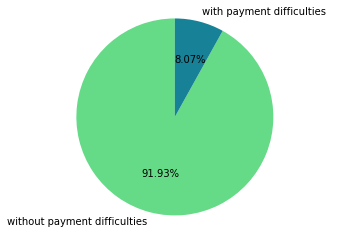

In [220]:
target0 = appl_train[appl_train['TARGET'] == 0].shape[0]
target1 = appl_train[appl_train['TARGET'] == 1].shape[0]

sizes= [target0, target1]
labels= ['without payment difficulties', 'with payment difficulties']
colors=['#65DA87', '#178197']

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.2f%%')

plt.axis('equal')
plt.show()

### Amount Income Group of Loaners

In [221]:
print("Min amount income:")
print(appl_train['AMT_INCOME_TOTAL'].min())
print()
print("Max amount income:")
print(appl_train['AMT_INCOME_TOTAL'].max())
print()
print("Mean amount income:")
print(appl_train['AMT_INCOME_TOTAL'].mean())

Min amount income:
25650.0

Max amount income:
117000000.0

Mean amount income:
168797.9192969845


In [222]:
def amt_income_group(income):
    if income < 112500:
        return 'Low Income'
    elif 112500 <= income < 202500:
        return 'Mid Income'
    else:
        return 'High Income'

In [223]:
appl_train['AMT_INCOME_GROUP'] = appl_train['AMT_INCOME_TOTAL'].apply(amt_income_group)

appl_train['AMT_INCOME_GROUP'].value_counts()

Mid Income     150073
High Income     87879
Low Income      69559
Name: AMT_INCOME_GROUP, dtype: int64

In [224]:
appl_train_amt_income_group = appl_train.groupby(['AMT_INCOME_GROUP','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_amt_income_group = appl_train_amt_income_group.reset_index()
appl_train_amt_income_group.columns = ['AMT_INCOME_GROUP','TARGET','TOTAL_LOANERS']
appl_train_amt_income_group['RATIO_TOTAL_LOANERS'] = round((appl_train_amt_income_group['TOTAL_LOANERS'])/len(appl_train)*100, 2)
appl_train_amt_income_group

,AMT_INCOME_GROUP,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,High Income,0,81609,26.54
1,High Income,1,6270,2.04
2,Low Income,0,63836,20.76
3,Low Income,1,5723,1.86
4,Mid Income,0,137241,44.63
5,Mid Income,1,12832,4.17


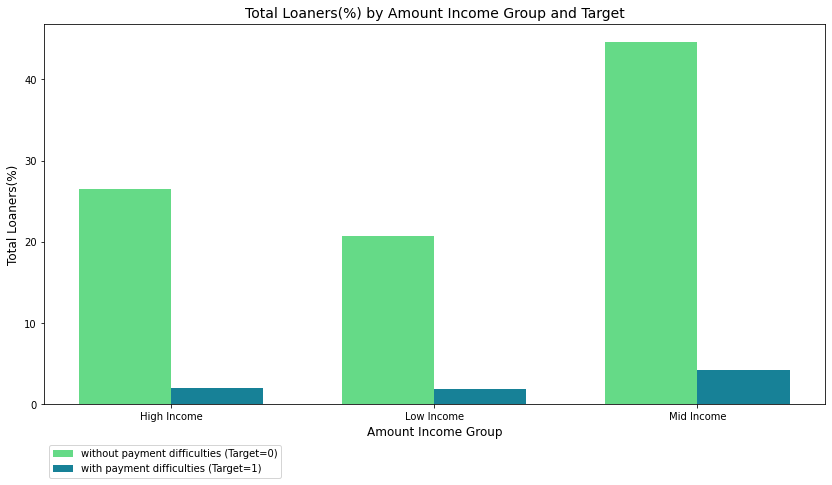

In [225]:
amt_income_group_target0 = appl_train_amt_income_group[appl_train_amt_income_group['TARGET'] == 0]
amt_income_group_target1 = appl_train_amt_income_group[appl_train_amt_income_group['TARGET'] == 1]
ratio_0 = amt_income_group_target0['RATIO_TOTAL_LOANERS']
ratio_1 = amt_income_group_target1['RATIO_TOTAL_LOANERS']

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Amount Income Group', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Amount Income Group and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('High Income', 'Low Income', 'Mid Income'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**4% of loaners in ‘Mid Income’ have payment difficulties**

### Age Group of Loaners

In [226]:
def age(days):
  age = math.floor(-days/365)
  return age

In [227]:
appl_train['AGE'] = appl_train['DAYS_BIRTH'].apply(age)

print("Min Age Value:")
print(appl_train['AGE'].min())

print("Max Age Value:")
print(appl_train['AGE'].max())

print("Age Value Count:")
print(appl_train['AGE'].value_counts())

Min Age Value:
20
Max Age Value:
69
Age Value Count:
38    8873
37    8799
39    8770
40    8624
36    8614
27    8476
41    8449
31    8377
43    8308
42    8216
28    7975
32    7911
44    7819
30    7806
35    7804
33    7714
29    7670
34    7631
54    7551
53    7457
46    7293
45    7205
47    7018
48    6984
56    6828
57    6768
52    6763
51    6689
55    6637
59    6631
49    6627
50    6482
58    6268
60    6227
62    5514
61    5418
63    5197
64    5117
26    4561
25    4168
23    4057
24    3905
65    3113
22    2933
66    2085
67    2042
21    1254
68     866
69      16
20       1
Name: AGE, dtype: int64


In [228]:
def age_group(age):
  if age < 20:
    return "Late Ten"
  elif 20 <= age < 30:
    return "Twenty"
  elif 30 <= age < 40:
    return "Thirty"
  elif 40 <= age < 50:
    return "Fourty"
  elif 50 <= age < 60:
    return "Fifty"
  else:
    return "Above_Sixty"

In [229]:
appl_train['AGE_GROUP'] = appl_train['AGE'].apply(age_group)

print("Age Group Value Count:")
print(appl_train['AGE_GROUP'].value_counts())

Age Group Value Count:
Thirty         82299
Fourty         76543
Fifty          68074
Twenty         45000
Above_Sixty    35595
Name: AGE_GROUP, dtype: int64


In [230]:
appl_train_age_group = appl_train.groupby(['AGE_GROUP','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_age_group = appl_train_age_group.reset_index()
appl_train_age_group.columns = ['AGE_GROUP','TARGET','TOTAL_LOANERS']
appl_train_age_group['RATIO_TOTAL_LOANERS'] = round((appl_train_age_group['TOTAL_LOANERS'])/len(appl_train)*100, 2)
appl_train_age_group

,AGE_GROUP,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Above_Sixty,0,33843,11.01
1,Above_Sixty,1,1752,0.57
2,Fifty,0,63901,20.78
3,Fifty,1,4173,1.36
4,Fourty,0,70683,22.99
5,Fourty,1,5860,1.91
6,Thirty,0,74414,24.20
7,Thirty,1,7885,2.56
8,Twenty,0,39845,12.96
9,Twenty,1,5155,1.68


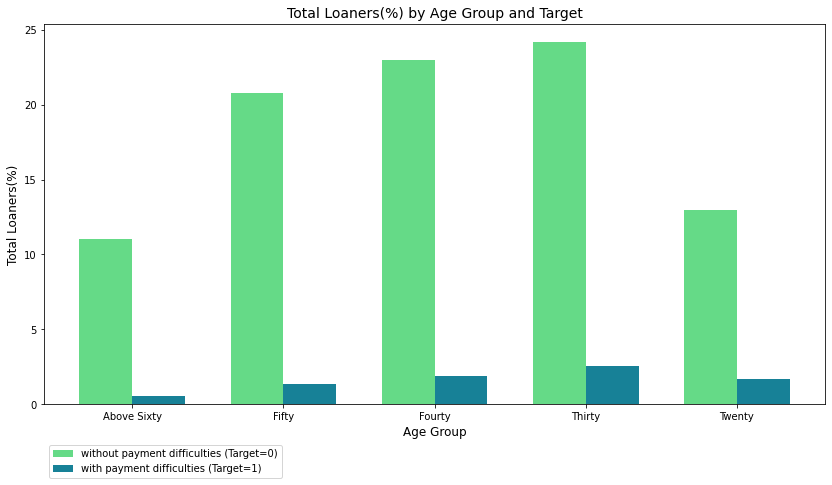

In [231]:
age_group_target0 = appl_train_age_group[appl_train_age_group['TARGET'] == 0]
age_group_target1 = appl_train_age_group[appl_train_age_group['TARGET'] == 1]
ratio_0 = age_group_target0['RATIO_TOTAL_LOANERS']
ratio_1 = age_group_target1['RATIO_TOTAL_LOANERS']

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Age Group and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Above Sixty', 'Fifty', 'Fourty', 'Thirty', 'Twenty'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**2.5% of loaners in ‘Thirty’ have payment difficulties**

### Gender of Loaners

In [232]:
appl_train_gender = appl_train.groupby(['CODE_GENDER','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_gender = appl_train_gender.reset_index()
appl_train_gender.columns = ['CODE_GENDER','TARGET','TOTAL_LOANERS']
appl_train_gender['RATIO_TOTAL_LOANERS'] = round((appl_train_gender['TOTAL_LOANERS'])/len(appl_train)*100, 2)

appl_train_gender.loc[len(appl_train_gender.index)] = ['XNA', 1, 0, 0.00]
appl_train_gender

,CODE_GENDER,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,F,0,188278,61.23
1,F,1,14170,4.61
2,M,0,94404,30.70
3,M,1,10655,3.46
4,XNA,0,4,0.00
5,XNA,1,0,0.00


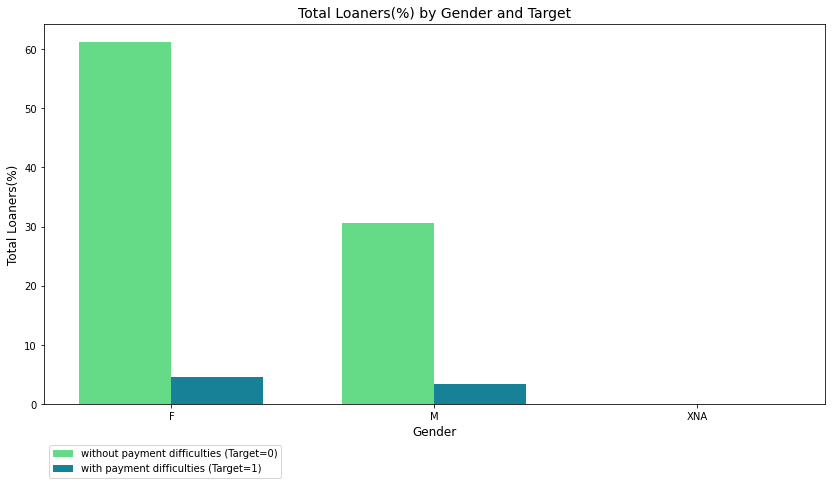

In [233]:
gender_target0 = appl_train_gender[appl_train_gender['TARGET'] == 0]
gender_target1 = appl_train_gender[appl_train_gender['TARGET'] == 1]
ratio_0 = gender_target0['RATIO_TOTAL_LOANERS']
ratio_1 = gender_target1['RATIO_TOTAL_LOANERS']

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Gender and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('F', 'M', 'XNA'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**4.6% ‘Female’ loaners have payment difficulties**

### Job Type of Loaners

In [234]:
appl_train_income_type = appl_train.groupby(['NAME_INCOME_TYPE','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_income_type = appl_train_income_type.reset_index()
appl_train_income_type.columns = ['NAME_INCOME_TYPE','TARGET','TOTAL_LOANERS']
appl_train_income_type['RATIO_TOTAL_LOANERS'] = round((appl_train_income_type['TOTAL_LOANERS'])/len(appl_train)*100, 2)

appl_train_income_type

,NAME_INCOME_TYPE,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Businessman,0,10,0.00
1,Commercial associate,0,66257,21.55
2,Commercial associate,1,5360,1.74
3,Maternity leave,0,3,0.00
4,Maternity leave,1,2,0.00
5,Pensioner,0,52380,17.03
6,Pensioner,1,2982,0.97
7,State servant,0,20454,6.65
8,State servant,1,1249,0.41
9,Student,0,18,0.01


In [235]:
businessman1 = pd.Series(['Businessman', 1, 0, 0.00], index=appl_train_income_type.columns)
appl_train_income_type = pd.concat([appl_train_income_type.iloc[:1], businessman1.to_frame().T, appl_train_income_type.iloc[1:]], ignore_index=True)
appl_train_income_type

,NAME_INCOME_TYPE,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Businessman,0,10,0.0
1,Businessman,1,0,0.0
2,Commercial associate,0,66257,21.55
3,Commercial associate,1,5360,1.74
4,Maternity leave,0,3,0.0
5,Maternity leave,1,2,0.0
6,Pensioner,0,52380,17.03
7,Pensioner,1,2982,0.97
8,State servant,0,20454,6.65
9,State servant,1,1249,0.41


In [236]:
student1 = pd.Series(['Student', 1, 0, 0.00], index=appl_train_income_type.columns)
appl_train_income_type = pd.concat([appl_train_income_type.iloc[:11], student1.to_frame().T, appl_train_income_type.iloc[11:]], ignore_index=True)
appl_train_income_type

,NAME_INCOME_TYPE,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Businessman,0,10,0.0
1,Businessman,1,0,0.0
2,Commercial associate,0,66257,21.55
3,Commercial associate,1,5360,1.74
4,Maternity leave,0,3,0.0
5,Maternity leave,1,2,0.0
6,Pensioner,0,52380,17.03
7,Pensioner,1,2982,0.97
8,State servant,0,20454,6.65
9,State servant,1,1249,0.41


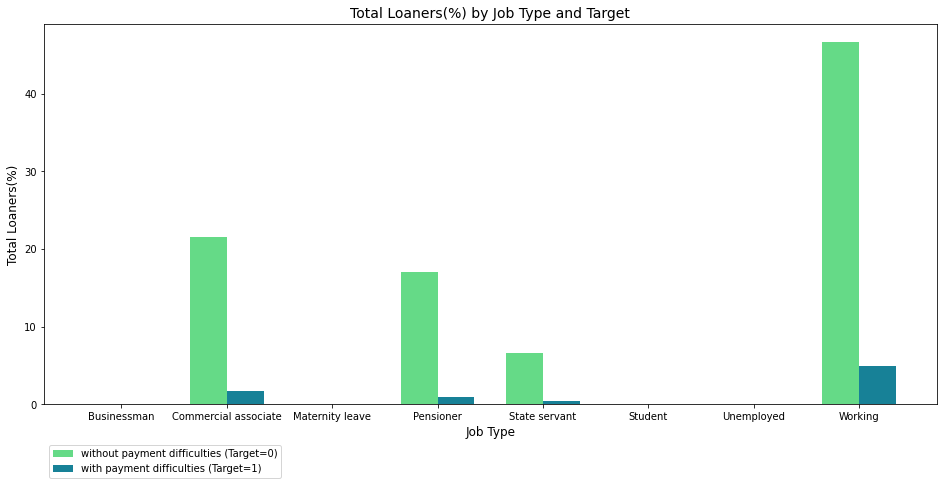

In [237]:
income_type_target0 = appl_train_income_type[appl_train_income_type['TARGET'] == 0]
income_type_target1 = appl_train_income_type[appl_train_income_type['TARGET'] == 1]
ratio_0 = income_type_target0['RATIO_TOTAL_LOANERS']
ratio_1 = income_type_target1['RATIO_TOTAL_LOANERS']

N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Job Type', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Job Type and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**4.9% of loaners in ‘ Working‘ have payment difficulties**

### Education Group of Loaners

In [238]:
appl_train_education_group = appl_train.groupby(['NAME_EDUCATION_TYPE','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_education_group = appl_train_education_group.reset_index()
appl_train_education_group.columns = ['EDUCATION_GROUP','TARGET','TOTAL_LOANERS']
appl_train_education_group['RATIO_TOTAL_LOANERS'] = round((appl_train_education_group['TOTAL_LOANERS'])/len(appl_train)*100, 2)
appl_train_education_group

,EDUCATION_GROUP,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Academic degree,0,161,0.05
1,Academic degree,1,3,0.00
2,Higher education,0,70854,23.04
3,Higher education,1,4009,1.30
4,Incomplete higher,0,9405,3.06
5,Incomplete higher,1,872,0.28
6,Lower secondary,0,3399,1.11
7,Lower secondary,1,417,0.14
8,Secondary / secondary special,0,198867,64.67
9,Secondary / secondary special,1,19524,6.35


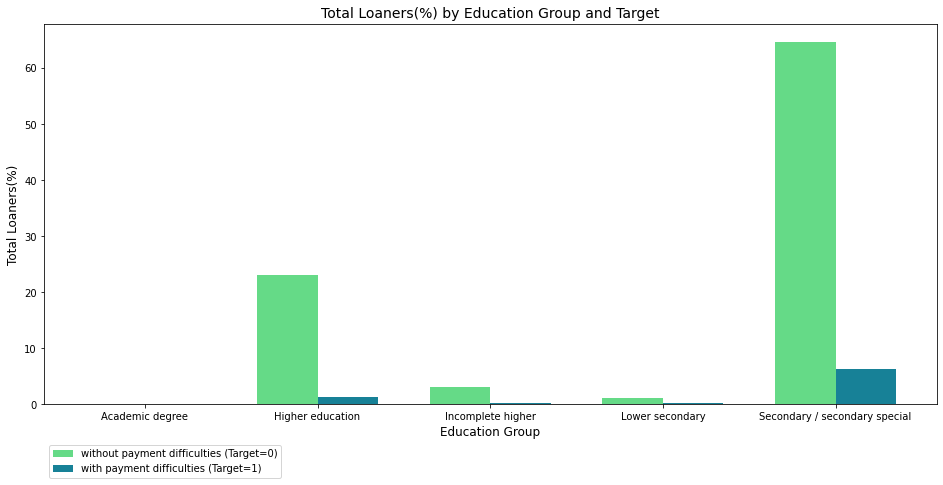

In [239]:
education_group_target0 = appl_train_education_group[appl_train_education_group['TARGET'] == 0]
education_group_target1 = appl_train_education_group[appl_train_education_group['TARGET'] == 1]
ratio_0 = education_group_target0['RATIO_TOTAL_LOANERS']
ratio_1 = education_group_target1['RATIO_TOTAL_LOANERS']

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Education Group', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Education Group and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**6.35% of loaners in ‘Secondary / secondary special’ have payment difficulties**


### Family Status Group of Loaners

In [240]:
appl_train_fam_status_group = appl_train.groupby(['NAME_FAMILY_STATUS','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_fam_status_group = appl_train_fam_status_group.reset_index()
appl_train_fam_status_group.columns = ['FAMILY_STATUS_GROUP','TARGET','TOTAL_LOANERS']
appl_train_fam_status_group['RATIO_TOTAL_LOANERS'] = round((appl_train_fam_status_group['TOTAL_LOANERS'])/len(appl_train)*100, 2)
appl_train_fam_status_group

,FAMILY_STATUS_GROUP,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Civil marriage,0,26814,8.72
1,Civil marriage,1,2961,0.96
2,Married,0,181582,59.05
3,Married,1,14850,4.83
4,Separated,0,18150,5.90
5,Separated,1,1620,0.53
6,Single / not married,0,40987,13.33
7,Single / not married,1,4457,1.45
8,Unknown,0,2,0.00
9,Widow,0,15151,4.93


In [241]:
unknown1 = pd.Series(['Unknown', 1, 0, 0.00], index=appl_train_fam_status_group.columns)
appl_train_fam_status_group = pd.concat([appl_train_fam_status_group.iloc[:9], unknown1.to_frame().T, appl_train_fam_status_group.iloc[9:]], ignore_index=True)
appl_train_fam_status_group

,FAMILY_STATUS_GROUP,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Civil marriage,0,26814,8.72
1,Civil marriage,1,2961,0.96
2,Married,0,181582,59.05
3,Married,1,14850,4.83
4,Separated,0,18150,5.9
5,Separated,1,1620,0.53
6,Single / not married,0,40987,13.33
7,Single / not married,1,4457,1.45
8,Unknown,0,2,0.0
9,Unknown,1,0,0.0


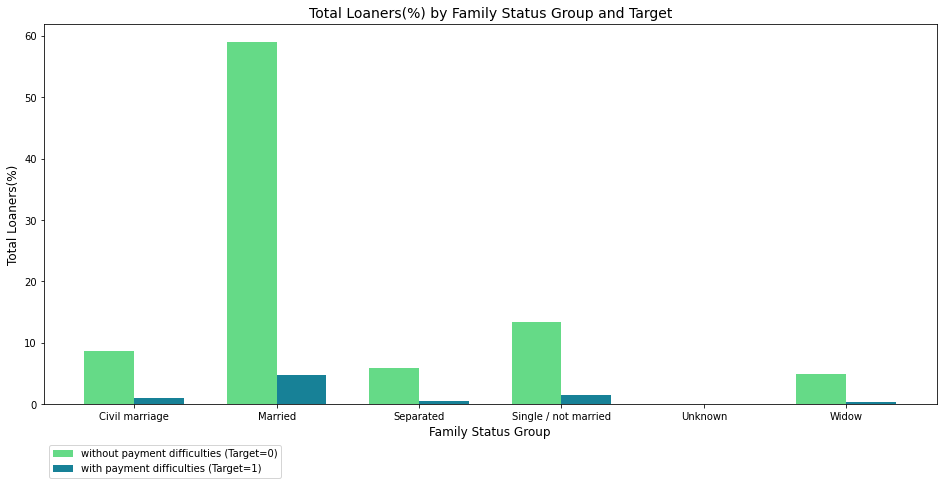

In [242]:
fam_status_group_target0 = appl_train_fam_status_group[appl_train_fam_status_group['TARGET'] == 0]
fam_status_group_target1 = appl_train_fam_status_group[appl_train_fam_status_group['TARGET'] == 1]
ratio_0 = fam_status_group_target0['RATIO_TOTAL_LOANERS']
ratio_1 = fam_status_group_target1['RATIO_TOTAL_LOANERS']

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Family Status Group', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Family Status Group and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Civil marriage', 'Married', 'Separated', 'Single / not married', 'Unknown', 'Widow'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**4.8% of loaners in ‘Married’ have payment difficulties**

### House Type of Loaners

In [243]:
appl_train_house_type = appl_train.groupby(['NAME_HOUSING_TYPE','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_house_type = appl_train_house_type.reset_index()
appl_train_house_type.columns = ['HOUSE_TYPE','TARGET','TOTAL_LOANERS']
appl_train_house_type['RATIO_TOTAL_LOANERS'] = round((appl_train_house_type['TOTAL_LOANERS'])/len(appl_train)*100, 2)
appl_train_house_type

,HOUSE_TYPE,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Co-op apartment,0,1033,0.34
1,Co-op apartment,1,89,0.03
2,House / apartment,0,251596,81.82
3,House / apartment,1,21272,6.92
4,Municipal apartment,0,10228,3.33
5,Municipal apartment,1,955,0.31
6,Office apartment,0,2445,0.80
7,Office apartment,1,172,0.06
8,Rented apartment,0,4280,1.39
9,Rented apartment,1,601,0.20


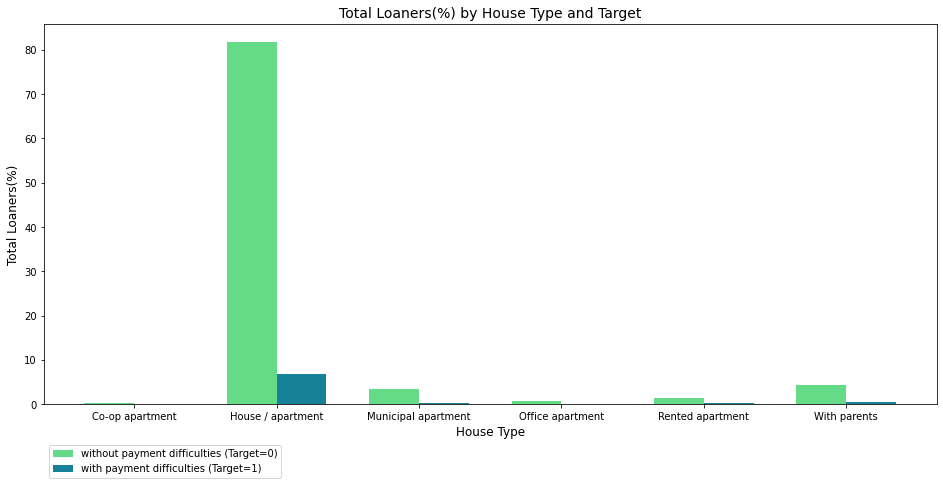

In [245]:
house_type_target0 = appl_train_house_type[appl_train_house_type['TARGET'] == 0]
house_type_target1 = appl_train_house_type[appl_train_house_type['TARGET'] == 1]
ratio_0 = house_type_target0['RATIO_TOTAL_LOANERS']
ratio_1 = house_type_target1['RATIO_TOTAL_LOANERS']

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('House Type', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by House Type and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

**6.9% of loaners that live in ‘House / apartment’ have payment difficulties**

### Name Contract Type of loaners

In [246]:
appl_train_contract_type = appl_train.groupby(['NAME_CONTRACT_TYPE','TARGET']).agg({'SK_ID_CURR' : ['count']})
appl_train_contract_type = appl_train_contract_type.reset_index()
appl_train_contract_type.columns = ['NAME_CONTRACT_TYPE','TARGET','TOTAL_LOANERS']
appl_train_contract_type['RATIO_TOTAL_LOANERS'] = round((appl_train_contract_type['TOTAL_LOANERS'])/len(appl_train)*100, 2)
appl_train_contract_type

,NAME_CONTRACT_TYPE,TARGET,TOTAL_LOANERS,RATIO_TOTAL_LOANERS
0,Cash loans,0,255011,82.93
1,Cash loans,1,23221,7.55
2,Revolving loans,0,27675,9.00
3,Revolving loans,1,1604,0.52


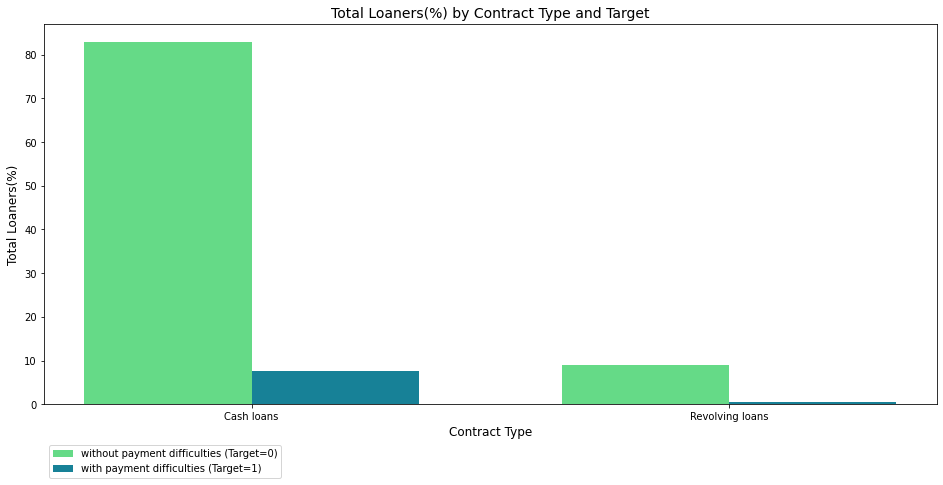

In [247]:
contract_type_target0 = appl_train_contract_type[appl_train_contract_type['TARGET'] == 0]
contract_type_target1 = appl_train_contract_type[appl_train_contract_type['TARGET'] == 1]
ratio_0 = contract_type_target0['RATIO_TOTAL_LOANERS']
ratio_1 = contract_type_target1['RATIO_TOTAL_LOANERS']

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))

rects0 = ax.bar(ind - width/2, ratio_0, width, color ='#65DA87', label = 'without payment difficulties (Target=0)') 
rects1 = ax.bar(ind + width/2, ratio_1, width, color = '#178197', label = 'with payment difficulties (Target=1)')

ax.set_xlabel('Contract Type', fontsize=12)
ax.set_ylabel('Total Loaners(%)', fontsize=12)
ax.set_title('Total Loaners(%) by Contract Type and Target', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Cash loans', 'Revolving loans'))
ax.legend(loc='center left', bbox_to_anchor=(0, -0.15))

# Data Pre-processing

In [248]:
appl_train.info(null_counts=True, verbose=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 125 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Missing Value

**Check Missing Values**

In [249]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

In [250]:
df_null = check_null(appl_train)
df_null

,Total,Percent
COMMONAREA_MODE,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MEDI,214865,0.698723
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...
EXT_SOURCE_2,660,0.002146
AMT_GOODS_PRICE,278,0.000904
AMT_ANNUITY,12,0.000039
CNT_FAM_MEMBERS,2,0.000007


In [251]:
df_null[df_null['Percent'] > 0.65]

,Total,Percent
COMMONAREA_MODE,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MEDI,214865,0.698723
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550


**Handle Missing Values**


> Drop columns where the percentage of missing value is more than 65%



In [252]:
appl_train = appl_train.drop(['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 
                              'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
                              'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                              'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
                              'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE'], axis=1)

In [253]:
with pd.option_context('display.max_rows', None,):
  display(check_null(appl_train))

,Total,Percent
LANDAREA_AVG,182590,0.593767
LANDAREA_MEDI,182590,0.593767
LANDAREA_MODE,182590,0.593767
BASEMENTAREA_AVG,179943,0.585160
BASEMENTAREA_MODE,179943,0.585160
BASEMENTAREA_MEDI,179943,0.585160
EXT_SOURCE_1,173378,0.563811
NONLIVINGAREA_AVG,169682,0.551792
NONLIVINGAREA_MODE,169682,0.551792
NONLIVINGAREA_MEDI,169682,0.551792


In [254]:
check_null(appl_train).shape

(50, 2)



> Impute the rest of the columns that still have missing value using `Simple Imputer` 



In [255]:
# create a dataframe for data of numeric type
appl_train_num = appl_train.select_dtypes(include=np.number)
display(appl_train_num)

# create a dataframe for data of categorical type
appl_train_cat = appl_train.select_dtypes(include=np.object)
display(appl_train_cat)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_INCOME_GROUP,AGE_GROUP
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No,High Income,Twenty
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No,High Income,Fourty
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,Low Income,Fifty
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,Mid Income,Fifty
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,Mid Income,Fifty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,block of flats,"Stone, brick",No,Mid Income,Twenty
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,block of flats,"Stone, brick",No,Low Income,Fifty
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,block of flats,Panel,No,Mid Income,Fourty
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,block of flats,"Stone, brick",No,Mid Income,Thirty


In [256]:
from sklearn.impute import SimpleImputer

# impute numeric column
imputer_num = SimpleImputer(missing_values=np.nan, strategy='median')
appl_train_num = pd.DataFrame(imputer_num.fit_transform(appl_train_num), columns = appl_train_num.columns)

# impute categorical column
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
appl_train_cat = pd.DataFrame(imputer_cat.fit_transform(appl_train_cat), columns = appl_train_cat.columns)

# join two dataframes back
appl_train = pd.concat([appl_train_num, appl_train_cat], axis = 1)
appl_train = appl_train.reset_index(drop=True)

In [257]:
appl_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_INCOME_GROUP,AGE_GROUP
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No,High Income,Twenty
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No,High Income,Fourty
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No,Low Income,Fifty
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No,Mid Income,Fifty
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No,Mid Income,Fifty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,Separated,With parents,Sales staff,THURSDAY,Services,block of flats,"Stone, brick",No,Mid Income,Twenty
307507,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,Widow,House / apartment,Laborers,MONDAY,XNA,block of flats,"Stone, brick",No,Low Income,Fifty
307508,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,Separated,House / apartment,Managers,THURSDAY,School,block of flats,Panel,No,Mid Income,Fourty
307509,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,block of flats,"Stone, brick",No,Mid Income,Thirty


In [258]:
check_null(appl_train)

,Total,Percent


In [259]:
with pd.option_context('display.max_rows', None,):
  display(appl_train.isna().sum())

SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_1                    0
EXT_SOURCE_2  

successfully handle all the missing values

## Duplicate Data

In [260]:
appl_train.duplicated().sum()

0

In [261]:
df_duplicateRows = appl_train[appl_train.duplicated()]
print(df_duplicateRows)

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, LANDAREA_AVG, LIVINGAREA_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, LANDAREA_MODE, LIVINGAREA_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, ELEVATORS_MEDI, ENTR

There is no duplicate data

## Outlier

**Check outlier**

In [262]:
def detect_outliers(data, lower_limit, upper_limit):
    outliers = []
    for i in data:
        if i < lower_limit or i > upper_limit:
            outliers.append(i)
    return outliers

def count_outlier(feature):
    arr =[]
    sorted_data = appl_train.sort_values(by=[feature])
    # Calculate quartil 1 dan 3.
    Q1 = sorted_data[feature].quantile(0.25)
    Q3 = sorted_data[feature].quantile(0.75)

    # Calculate RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    # Calculate outliers
    feature_outliers = detect_outliers(sorted_data[feature], lower_limit, upper_limit)
    percent =len(feature_outliers)/len(sorted_data[feature])
    ranges = appl_train[feature].max() - appl_train[feature].min()
    arr.append(len(feature_outliers))
    arr.append(percent)
    arr.append(ranges)
    return arr
    
def print_outlier(data):
    arr=[]
    dict1={}
    dict2={}
    dict3={}
    for i in data.columns:
        dict1[i]= count_outlier(i)[0]
        dict2[i] = count_outlier(i)[1]
        dict3[i] = count_outlier(i)[2]
    arr.append(dict1)
    arr.append(dict2)
    arr.append(dict3)
    return arr

In [263]:
# create dataframe for numeric columns
df_outlier = appl_train.select_dtypes(include=np.number)

# detect outlier for df
outliers = print_outlier(df_outlier)
col_outlier= pd.Series(outliers[0])
col_percentage = pd.Series(outliers[1])
col_range = pd.Series(outliers[2])

# display the outlier with percentage
df_outlier= pd.concat([col_outlier, col_percentage,col_range], axis=1, keys=['Total', 'Percent','Range'])
display(df_outlier)

,Total,Percent,Range
SK_ID_CURR,0,0.000000,356253.0
TARGET,24825,0.080729,1.0
CNT_CHILDREN,4272,0.013892,19.0
AMT_INCOME_TOTAL,14035,0.045641,116974350.0
AMT_CREDIT,6562,0.021339,4005000.0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,8536,0.027758,8.0
AMT_REQ_CREDIT_BUREAU_MON,43759,0.142301,27.0
AMT_REQ_CREDIT_BUREAU_QRT,50575,0.164466,261.0
AMT_REQ_CREDIT_BUREAU_YEAR,7233,0.023521,25.0


In [264]:
df_outlier = df_outlier[df_outlier['Total']>0]

with pd.option_context('display.max_rows', None,):
  display(df_outlier) 

print(df_outlier.shape)

,Total,Percent,Range
TARGET,24825,0.080729,1.000000e+00
CNT_CHILDREN,4272,0.013892,1.900000e+01
AMT_INCOME_TOTAL,14035,0.045641,1.169744e+08
AMT_CREDIT,6562,0.021339,4.005000e+06
AMT_ANNUITY,7504,0.024402,2.564100e+05
AMT_GOODS_PRICE,14728,0.047894,4.009500e+06
REGION_POPULATION_RELATIVE,8412,0.027355,7.221800e-02
DAYS_EMPLOYED,72217,0.234844,3.831550e+05
DAYS_REGISTRATION,659,0.002143,2.467200e+04
FLAG_MOBIL,1,0.000003,1.000000e+00


(84, 3)


## Encoding

Encode categorical feature to numeric using `One Hot Encoding`

In [265]:
appl_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 108 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    float64
 1    TARGET                        float64
 2    CNT_CHILDREN                  float64
 3    AMT_INCOME_TOTAL              float64
 4    AMT_CREDIT                    float64
 5    AMT_ANNUITY                   float64
 6    AMT_GOODS_PRICE               float64
 7    REGION_POPULATION_RELATIVE    float64
 8    DAYS_BIRTH                    float64
 9    DAYS_EMPLOYED                 float64
 10   DAYS_REGISTRATION             float64
 11   DAYS_ID_PUBLISH               float64
 12   FLAG_MOBIL                    float64
 13   FLAG_EMP_PHONE                float64
 14   FLAG_WORK_PHONE               float64
 15   FLAG_CONT_MOBILE              float64
 16   FLAG_PHONE                    float64
 17   FLAG_EMAIL                    float64
 18   CN

In [266]:
appl_train.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_INCOME_GROUP,AGE_GROUP
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,3,7,2,3,5
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No,Mid Income,Thirty
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992,304800,222381,305183,150073,82299


In [267]:
cat_features = ['NAME_CONTRACT_TYPE',	'CODE_GENDER', 'FLAG_OWN_CAR',	'FLAG_OWN_REALTY',
                'NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',	'OCCUPATION_TYPE',	
                'WEEKDAY_APPR_PROCESS_START',	'ORGANIZATION_TYPE',	'HOUSETYPE_MODE',
                'WALLSMATERIAL_MODE',	'EMERGENCYSTATE_MODE',	'AMT_INCOME_GROUP',	'AGE_GROUP']

one_hot_encoded_data = pd.get_dummies(appl_train, columns = cat_features)         

In [268]:
one_hot_encoded_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 235 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    SK_ID_CURR                                         float64
 1    TARGET                                             float64
 2    CNT_CHILDREN                                       float64
 3    AMT_INCOME_TOTAL                                   float64
 4    AMT_CREDIT                                         float64
 5    AMT_ANNUITY                                        float64
 6    AMT_GOODS_PRICE                                    float64
 7    REGION_POPULATION_RELATIVE                         float64
 8    DAYS_BIRTH                                         float64
 9    DAYS_EMPLOYED                                      float64
 10   DAYS_REGISTRATION                                  float64
 11   DAYS_ID_PUBLISH                      

In [269]:
appl_train = one_hot_encoded_data
display(appl_train)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,AMT_INCOME_GROUP_High Income,AMT_INCOME_GROUP_Low Income,AMT_INCOME_GROUP_Mid Income,AGE_GROUP_Above_Sixty,AGE_GROUP_Fifty,AGE_GROUP_Fourty,AGE_GROUP_Thirty,AGE_GROUP_Twenty
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,1,0,1,0,0,0,0,0,0,1
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,1,0,1,0,0,0,0,1,0,0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,1,0,0,1,0,0,1,0,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,1,0,0,0,1,0,1,0,0,0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,1,0,0,0,1,0,0,0,0,1
307507,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,1,0,0,1,0,0,1,0,0,0
307508,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,1,0,0,0,1,0,0,1,0,0
307509,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,1,0,0,0,1,0,0,0,1,0


## Standardization

Apply standardization only to numerical columns and not the other One-Hot Encoded features.

In [270]:
# numerical features
num_cols = appl_train_num[[col for col in appl_train_num.columns if col not in ['SK_ID_CURR', 'TARGET']]].columns
print(num_cols.shape)
print(num_cols)

(89,)
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX

In [271]:
from sklearn.preprocessing import StandardScaler

appl_train_stand = appl_train.copy()

# apply standardization on numerical features
for i in num_cols:

  # fit on training data column
  scale = StandardScaler().fit(appl_train_stand[[i]])

  # transform the training data column
  appl_train_stand[i] = scale.transform(appl_train_stand[[i]])

In [272]:
appl_train_stand

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,AMT_INCOME_GROUP_High Income,AMT_INCOME_GROUP_Low Income,AMT_INCOME_GROUP_Mid Income,AGE_GROUP_Above_Sixty,AGE_GROUP_Fifty,AGE_GROUP_Fourty,AGE_GROUP_Thirty,AGE_GROUP_Twenty
0,100002.0,1.0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,...,1,0,1,0,0,0,0,0,0,1
1,100003.0,0.0,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,...,1,0,1,0,0,0,0,1,0,0
2,100004.0,0.0,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,...,1,0,0,1,0,0,1,0,0,0
3,100006.0,0.0,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,...,1,0,0,0,1,0,1,0,0,0
4,100007.0,0.0,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,-0.577538,-0.047646,-0.855489,0.031015,-0.848433,0.845396,1.537586,-0.453377,...,1,0,0,0,1,0,0,0,0,1
307507,456252.0,0.0,-0.577538,-0.408219,-0.818594,-1.042333,-0.848433,0.310593,-1.085707,2.133617,...,1,0,0,1,0,0,1,0,0,0
307508,456253.0,0.0,-0.577538,-0.066623,0.195379,0.198056,0.126415,-1.147120,0.245417,-0.507774,...,1,0,0,0,1,0,0,1,0,0
307509,456254.0,1.0,-0.577538,0.009287,-0.568757,-0.476318,-0.592535,-1.124635,0.934008,-0.485583,...,1,0,0,0,1,0,0,0,1,0


## Normalization

Apply normalization to all numerical columns including One-Hot Encoded features.

In [273]:
# numerical features
num_cols = appl_train[[col for col in appl_train.columns if col not in ['SK_ID_CURR', 'TARGET']]].columns
print(num_cols.shape)
print(num_cols)

(233,)
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes',
       'AMT_INCOME_GROUP_High Income', 'AMT_INCOME_GROUP_Low Income',
       'AMT_INCOME_GROUP_Mid Income', 'AGE_GROUP_Above_Sixty',
       'AGE_GROUP_Fifty', 'AGE_GROUP_Fourty', 'AGE_GROUP_Thirty',
       'AGE_GROUP_Twenty'],
      dtype='object', length=233)


In [274]:
from sklearn.preprocessing import MinMaxScaler

appl_train_norm = appl_train.copy()

# apply normalization on numerical features
for i in num_cols:
  
  # fit on training data column
  norm = MinMaxScaler().fit(appl_train_norm[[i]])

  # transform the training data column
  appl_train_norm[i] = norm.transform(appl_train_norm[[i]])

In [275]:
appl_train_norm

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,AMT_INCOME_GROUP_High Income,AMT_INCOME_GROUP_Low Income,AMT_INCOME_GROUP_Mid Income,AGE_GROUP_Above_Sixty,AGE_GROUP_Fifty,AGE_GROUP_Fourty,AGE_GROUP_Thirty,AGE_GROUP_Twenty
0,100002.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004.0,0.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,0.896392,0.046133,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
307507,456252.0,0.0,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,0.251071,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
307508,456253.0,0.0,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,0.578523,0.026076,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
307509,456254.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,0.747914,0.034258,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Feature Selection

Select 10 best features using `SelectKBest`

In [276]:
# independent features
X = appl_train_norm[[col for col in appl_train_norm.columns if col not in ['SK_ID_CURR', 'TARGET']]]

# dependent features
y = appl_train_norm['TARGET']

In [277]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Features', 'Score']

In [278]:
with pd.option_context('display.max_rows', None,):
  display(feature_scores.sort_values(by=['Score'], ascending=False))

,Features,Score
114,NAME_EDUCATION_TYPE_Higher education,7.451081e+02
232,AGE_GROUP_Twenty,6.938418e+02
27,EXT_SOURCE_2,6.543632e+02
24,REG_CITY_NOT_WORK_CITY,6.153774e+02
92,CODE_GENDER_M,6.060355e+02
23,REG_CITY_NOT_LIVE_CITY,5.587089e+02
108,NAME_INCOME_TYPE_Pensioner,5.384165e+02
212,ORGANIZATION_TYPE_XNA,5.332222e+02
28,EXT_SOURCE_3,4.946101e+02
112,NAME_INCOME_TYPE_Working,4.914399e+02


In [279]:
best10_features = feature_scores.sort_values(by=['Score'], ascending=False).iloc[0:10]
best10_features

,Features,Score
114,NAME_EDUCATION_TYPE_Higher education,745.108117
232,AGE_GROUP_Twenty,693.841796
27,EXT_SOURCE_2,654.363170
24,REG_CITY_NOT_WORK_CITY,615.377434
92,CODE_GENDER_M,606.035521
23,REG_CITY_NOT_LIVE_CITY,558.708941
108,NAME_INCOME_TYPE_Pensioner,538.416471
212,ORGANIZATION_TYPE_XNA,533.222197
28,EXT_SOURCE_3,494.610060
112,NAME_INCOME_TYPE_Working,491.439930


# Modeling & Evaluation

In [280]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [281]:
target0 = appl_train_norm[appl_train_norm['TARGET'] == 0]
target1 = appl_train_norm[appl_train_norm['TARGET'] == 1]

print("Number of customers without payment difficulties: " + str(target0.shape[0]))
print("Number of customers with payment difficulties: " + str(target1.shape[0]))

Number of customers without payment difficulties: 282686
Number of customers with payment difficulties: 24825


We can see that there is a **data imbalance** which the number of customers with payment difficulties (Target=1) is very small compared to number of customers without payment difficulties (Target=0).

In [282]:
# independent features
X = appl_train_norm[['NAME_EDUCATION_TYPE_Higher education', 'AGE_GROUP_Twenty', 'EXT_SOURCE_2',
                    'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER_M', 'REG_CITY_NOT_LIVE_CITY',
                    'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'EXT_SOURCE_3', 
                    'NAME_INCOME_TYPE_Working']]

# dependent features
y = appl_train_norm['TARGET']

In [283]:
print(X)

        NAME_EDUCATION_TYPE_Higher education  AGE_GROUP_Twenty  EXT_SOURCE_2  \
0                                        0.0               1.0      0.307542   
1                                        1.0               0.0      0.727773   
2                                        0.0               0.0      0.650190   
3                                        0.0               0.0      0.760751   
4                                        0.0               0.0      0.377472   
...                                      ...               ...           ...   
307506                                   0.0               1.0      0.797231   
307507                                   0.0               0.0      0.135663   
307508                                   1.0               0.0      0.626575   
307509                                   0.0               0.0      0.601360   
307510                                   1.0               0.0      0.828736   

        REG_CITY_NOT_WORK_CITY  CODE_GE

In [284]:
print(y)

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    1.0
307510    0.0
Name: TARGET, Length: 307511, dtype: float64


In [285]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [286]:
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 215257
The number of records in the test dataset is 92254
The training dataset has 197845 records for the majority class and 17412 records for the minority class.


In [287]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train, y_train= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train).items()))

[(0.0, 197845), (1.0, 197845)]


In [288]:
def evaluation_metrics(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
 
  print('Accuracy        : ', accuracy)
  print('Precision       : ', precision)
  print('Recall          : ', recall)
  print('F1-Score        : ', f1)
  print('ROC AUC         : ', roc_auc)

## Logistic Regression

In [289]:
# Train the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, lr_prediction)

Accuracy        :  0.677173889479047
Precision       :  0.15060447971009966
Recall          :  0.650343990287333
F1-Score        :  0.2445718344155844
ROC AUC         :  0.6649310738909702


In [290]:
# Train the Logistic Regression model
lr = LogisticRegression(C=0.1, random_state=42)
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, lr_prediction)

Accuracy        :  0.6771196912870987
Precision       :  0.15064643057897695
Recall          :  0.6507486847430191
F1-Score        :  0.24465576264739441
ROC AUC         :  0.6650862741026301


In [291]:
# defining parameter for GridSearchCV
lr_param = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100, 1000]} 

lr_grid = GridSearchCV(lr, lr_param, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
lr_grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print('Best parameter: ', lr_grid.best_params_)
print() 

grid_predictions = lr_grid.predict(X_test) 
   
# Check the model performance
evaluation_metrics(y_test, grid_predictions)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameter:  {'C': 0.005}

Accuracy        :  0.6770871723719297
Precision       :  0.15058867618125604
Recall          :  0.6504788884392284
F1-Score        :  0.24456053152102247
ROC AUC         :  0.6649454825737119


In [292]:
# Train the Logistic Regression model
lr = LogisticRegression(C=0.001, random_state=42)
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, lr_prediction)

Accuracy        :  0.6761658031088082
Precision       :  0.15040776940795617
Recall          :  0.6518278699581815
F1-Score        :  0.24441690482814432
ROC AUC         :  0.6650601025160128


In [293]:
# Train the Logistic Regression model
lr = LogisticRegression(C=0.01, random_state=42)
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, lr_prediction)

Accuracy        :  0.6771522102022677
Precision       :  0.15068236469816682
Recall          :  0.6508835828949143
F1-Score        :  0.24471268448546937
ROC AUC         :  0.6651655099326235


Based our main metric ROC AUC, better performance is obtained with hyperparameter **C = 0.01**

## Random Forest Classifier

In [294]:
# Train the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, rf_prediction)

Accuracy        :  0.8758969800767447
Precision       :  0.1569194151649099
Recall          :  0.12451099419937947
F1-Score        :  0.13884919142534788
ROC AUC         :  0.5330302404431204


In [295]:
# Train the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators = 200, random_state=42)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, rf_prediction)

Accuracy        :  0.875951178268693
Precision       :  0.15635123614663257
Recall          :  0.12370160528800755
F1-Score        :  0.13812321132700706
ROC AUC         :  0.5326903731346864


In [296]:
# Train the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, rf_prediction)

Accuracy        :  0.666290892535825
Precision       :  0.1477741945206305
Recall          :  0.6614056387427493
F1-Score        :  0.2415746945210879
ROC AUC         :  0.6640616906718072


In [297]:
# Train the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Check the model performance
evaluation_metrics(y_test, rf_prediction)

Accuracy        :  0.6743339042209552
Precision       :  0.14992420258020606
Recall          :  0.6537164440847161
F1-Score        :  0.24390980471109322
ROC AUC         :  0.6649259015840889


## Testing Data

**Import testing data**

In [298]:
appl_test = pd.read_csv('drive/MyDrive/Internship/Home Credit Indonesia (Virtual Internship)/Final Project/dataset/application_test.csv')
appl_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


**Create additional features for testing data**

In [299]:
# create feature 'AMT_INCOME_GROUP' in test dataframe
appl_test['AMT_INCOME_GROUP'] = appl_test['AMT_INCOME_TOTAL'].apply(amt_income_group)

# create feature 'AGE' & 'AGE_GROUP' in test dataframe
appl_test['AGE'] = appl_test['DAYS_BIRTH'].apply(age)
appl_test['AGE_GROUP'] = appl_test['AGE'].apply(age_group)

In [300]:
appl_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP,AGE,AGE_GROUP
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Mid Income,52,Fifty
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,Low Income,49,Fourty
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0.0,0.0,0.0,0.0,1.0,4.0,High Income,54,Fifty
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,High Income,38,Thirty
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Mid Income,35,Thirty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,Mid Income,54,Fifty
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Mid Income,30,Thirty
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0.0,0.0,0.0,0.0,3.0,1.0,High Income,43,Fourty
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,High Income,38,Thirty


**Apply some pre-processing on testing data**

* **Missing Value**

In [301]:
df_null = check_null(appl_test)
display(df_null[df_null['Percent'] > 0.65])

,Total,Percent
COMMONAREA_MEDI,33495,0.687161
COMMONAREA_AVG,33495,0.687161
COMMONAREA_MODE,33495,0.687161
NONLIVINGAPARTMENTS_MEDI,33347,0.684125
NONLIVINGAPARTMENTS_MODE,33347,0.684125
NONLIVINGAPARTMENTS_AVG,33347,0.684125
FONDKAPREMONT_MODE,32797,0.672842
LIVINGAPARTMENTS_AVG,32780,0.672493
LIVINGAPARTMENTS_MEDI,32780,0.672493
LIVINGAPARTMENTS_MODE,32780,0.672493


Drop columns where the percentage of missing value is more than 65%

In [302]:
appl_test = appl_test.drop(['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 
                              'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
                              'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                              'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
                              'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE'], axis=1)

Impute the rest of the columns that still have missing value using `Simple Imputer`

In [303]:
# create a dataframe for data of numeric type
appl_test_num = appl_test.select_dtypes(include=np.number)
display(appl_test_num)

# create a dataframe for data of categorical type
appl_test_cat = appl_test.select_dtypes(include=np.object)
display(appl_test_cat)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,49
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,54
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,54
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,30
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,43
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_INCOME_GROUP,AGE_GROUP
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,Kindergarten,block of flats,"Stone, brick",No,Mid Income,Fifty
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,Low Income,Fourty
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3,NaN,NaN,NaN,High Income,Fifty
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No,High Income,Thirty
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3,NaN,NaN,NaN,Mid Income,Thirty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,NaN,WEDNESDAY,Other,NaN,NaN,NaN,Mid Income,Fifty
48740,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,MONDAY,Trade: type 7,NaN,NaN,NaN,Mid Income,Thirty
48741,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No,High Income,Fourty
48742,Cash loans,M,N,N,Family,Commercial associate,Higher education,Married,House / apartment,Managers,MONDAY,Self-employed,block of flats,Panel,No,High Income,Thirty


In [304]:
from sklearn.impute import SimpleImputer

# impute numeric column
imputer_num = SimpleImputer(missing_values=np.nan, strategy='median')
appl_test_num = pd.DataFrame(imputer_num.fit_transform(appl_test_num), columns = appl_test_num.columns)

# impute categorical column
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
appl_test_cat = pd.DataFrame(imputer_cat.fit_transform(appl_test_cat), columns = appl_test_cat.columns)

# join two dataframes back
appl_test = pd.concat([appl_test_num, appl_test_cat], axis = 1)
appl_test = appl_test.reset_index(drop=True)

In [305]:
appl_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_INCOME_GROUP,AGE_GROUP
0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,-5170.0,...,Married,House / apartment,Laborers,TUESDAY,Kindergarten,block of flats,"Stone, brick",No,Mid Income,Fifty
1,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,-9118.0,...,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,block of flats,Panel,No,Low Income,Fourty
2,100013.0,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038.0,-4458.0,-2175.0,...,Married,House / apartment,Drivers,MONDAY,Transport: type 3,block of flats,Panel,No,High Income,Fifty
3,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,-2000.0,...,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No,High Income,Thirty
4,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,-4000.0,...,Married,House / apartment,Laborers,FRIDAY,Business Entity Type 3,block of flats,Panel,No,Mid Income,Thirty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221.0,0.0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970.0,-5169.0,-9094.0,...,Widow,House / apartment,Laborers,WEDNESDAY,Other,block of flats,Panel,No,Mid Income,Fifty
48740,456222.0,2.0,157500.0,622413.0,31909.5,495000.0,0.035792,-11186.0,-1149.0,-3015.0,...,Married,House / apartment,Sales staff,MONDAY,Trade: type 7,block of flats,Panel,No,Mid Income,Thirty
48741,456223.0,1.0,202500.0,315000.0,33205.5,315000.0,0.026392,-15922.0,-3037.0,-2681.0,...,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No,High Income,Fourty
48742,456224.0,0.0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968.0,-2731.0,-1461.0,...,Married,House / apartment,Managers,MONDAY,Self-employed,block of flats,Panel,No,High Income,Thirty


In [306]:
check_null(appl_test)

,Total,Percent


In [307]:
with pd.option_context('display.max_rows', None,):
  display(appl_test.isna().sum())

SK_ID_CURR                      0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_1                    0
EXT_SOURCE_2                    0
EXT_SOURCE_3  

* **Encoding**

In [308]:
appl_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 107 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    float64
 1    CNT_CHILDREN                  float64
 2    AMT_INCOME_TOTAL              float64
 3    AMT_CREDIT                    float64
 4    AMT_ANNUITY                   float64
 5    AMT_GOODS_PRICE               float64
 6    REGION_POPULATION_RELATIVE    float64
 7    DAYS_BIRTH                    float64
 8    DAYS_EMPLOYED                 float64
 9    DAYS_REGISTRATION             float64
 10   DAYS_ID_PUBLISH               float64
 11   FLAG_MOBIL                    float64
 12   FLAG_EMP_PHONE                float64
 13   FLAG_WORK_PHONE               float64
 14   FLAG_CONT_MOBILE              float64
 15   FLAG_PHONE                    float64
 16   FLAG_EMAIL                    float64
 17   CNT_FAM_MEMBERS               float64
 18   REGI

In [309]:
appl_test.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_INCOME_GROUP,AGE_GROUP
count,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744
unique,2,2,2,2,7,7,5,5,6,18,7,58,3,7,2,3,5
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No,Mid Income,Thirty
freq,48305,32678,32311,33658,40638,24533,33988,32283,43645,24260,9751,10840,48278,35162,48388,24030,13107


In [310]:
cat_features = ['NAME_CONTRACT_TYPE',	'CODE_GENDER', 'FLAG_OWN_CAR',	'FLAG_OWN_REALTY',
                'NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',	'OCCUPATION_TYPE',	
                'WEEKDAY_APPR_PROCESS_START',	'ORGANIZATION_TYPE',	'HOUSETYPE_MODE',
                'WALLSMATERIAL_MODE',	'EMERGENCYSTATE_MODE',	'AMT_INCOME_GROUP',	'AGE_GROUP']

one_hot_encoded_data = pd.get_dummies(appl_test, columns = cat_features)         

In [311]:
one_hot_encoded_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 231 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    SK_ID_CURR                                         float64
 1    CNT_CHILDREN                                       float64
 2    AMT_INCOME_TOTAL                                   float64
 3    AMT_CREDIT                                         float64
 4    AMT_ANNUITY                                        float64
 5    AMT_GOODS_PRICE                                    float64
 6    REGION_POPULATION_RELATIVE                         float64
 7    DAYS_BIRTH                                         float64
 8    DAYS_EMPLOYED                                      float64
 9    DAYS_REGISTRATION                                  float64
 10   DAYS_ID_PUBLISH                                    float64
 11   FLAG_MOBIL                             

In [312]:
appl_test = one_hot_encoded_data
display(appl_test)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,AMT_INCOME_GROUP_High Income,AMT_INCOME_GROUP_Low Income,AMT_INCOME_GROUP_Mid Income,AGE_GROUP_Above_Sixty,AGE_GROUP_Fifty,AGE_GROUP_Fourty,AGE_GROUP_Thirty,AGE_GROUP_Twenty
0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,-5170.0,...,1,0,0,0,1,0,1,0,0,0
1,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,-9118.0,...,1,0,0,1,0,0,0,1,0,0
2,100013.0,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038.0,-4458.0,-2175.0,...,1,0,1,0,0,0,1,0,0,0
3,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,-2000.0,...,1,0,1,0,0,0,0,0,1,0
4,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,-4000.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221.0,0.0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970.0,-5169.0,-9094.0,...,1,0,0,0,1,0,1,0,0,0
48740,456222.0,2.0,157500.0,622413.0,31909.5,495000.0,0.035792,-11186.0,-1149.0,-3015.0,...,1,0,0,0,1,0,0,0,1,0
48741,456223.0,1.0,202500.0,315000.0,33205.5,315000.0,0.026392,-15922.0,-3037.0,-2681.0,...,1,0,1,0,0,0,0,1,0,0
48742,456224.0,0.0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968.0,-2731.0,-1461.0,...,1,0,1,0,0,0,0,0,1,0


* **Normalization**

In [313]:
# numerical features
num_cols = appl_test[[col for col in appl_test.columns if col not in ['SK_ID_CURR']]].columns
print(num_cols.shape)
print(num_cols)

(230,)
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes',
       'AMT_INCOME_GROUP_High Income', 'AMT_INCOME_GROUP_Low Income',
       'AMT_INCOME_GROUP_Mid Income', 'AGE_GROUP_Above_Sixty',
       'AGE_GROUP_Fifty', 'AGE_GROUP_Fourty', 'AGE_GROUP_Thirty',
       'AGE_GROUP_Twenty'],
      dtype='object', length=230)


In [314]:
from sklearn.preprocessing import MinMaxScaler

appl_test_norm = appl_test.copy()

# apply normalization on numerical features
for i in num_cols:
  
  # fit on training data column
  norm = MinMaxScaler().fit(appl_test_norm[[i]])

  # transform the training data column
  appl_test_norm[i] = norm.transform(appl_test_norm[[i]])

In [315]:
appl_test_norm

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,AMT_INCOME_GROUP_High Income,AMT_INCOME_GROUP_Low Income,AMT_INCOME_GROUP_Mid Income,AGE_GROUP_Above_Sixty,AGE_GROUP_Fifty,AGE_GROUP_Fourty,AGE_GROUP_Thirty,AGE_GROUP_Twenty
0,100001.0,0.00,0.024654,0.238037,0.102453,0.184049,0.257380,0.333427,0.039545,0.782059,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,100005.0,0.00,0.016440,0.080785,0.084558,0.061350,0.491855,0.399339,0.033953,0.615631,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100013.0,0.00,0.040054,0.280965,0.378515,0.265849,0.260854,0.288794,0.033982,0.908313,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100028.0,0.10,0.065721,0.695297,0.262078,0.695297,0.361760,0.628269,0.040755,0.915690,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100038.0,0.05,0.034920,0.263804,0.166995,0.263804,0.135340,0.680685,0.039905,0.831380,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221.0,0.00,0.021574,0.167035,0.085138,0.102249,0.024760,0.292602,0.032124,0.616643,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
48740,456222.0,0.10,0.029787,0.262401,0.166111,0.204499,0.491855,0.784510,0.042628,0.872903,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48741,456223.0,0.05,0.040054,0.122699,0.173381,0.122699,0.361760,0.519292,0.037695,0.886983,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48742,456224.0,0.00,0.045187,0.184049,0.128073,0.184049,0.257380,0.628717,0.038494,0.938412,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [316]:
test_X = appl_test_norm[['NAME_EDUCATION_TYPE_Higher education', 'AGE_GROUP_Twenty', 'EXT_SOURCE_2',
                    'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER_M', 'REG_CITY_NOT_LIVE_CITY',
                    'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'EXT_SOURCE_3', 
                    'NAME_INCOME_TYPE_Working']]

In [317]:
# predict test data
test_result = lr.predict(test_X)
test_result = pd.concat([appl_test['SK_ID_CURR'], pd.DataFrame(test_result)], axis=1)
test_result.columns = ['SK_ID_CURR', 'TARGET']
test_result.to_csv('test_result.csv', index=False)

# Business Recommendation



*   The highest number of loaners came from the **‘Mid Income’** category, but most also had payment difficulties. Therefore, **it is necessary to provide loans to customers according to certain principles and motivate customers to succeed.**
*   Create campaign or marketing strategy to **attract customers to ‘Revolving Loans’**.

